In [130]:
import pandas as pd
import geopandas as gpd
import shapely
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# pd.set_option("max_columns", None)


In [4]:
fine_df_file = '../data/interim/fine_enriched_parking_violations.tsv'

In [5]:
df = pd.read_csv(fine_df_file, sep='\t', parse_dates=['ticket_issue_datetime'])
# df['counter'] = 1


In [6]:
# Load Up Shape File

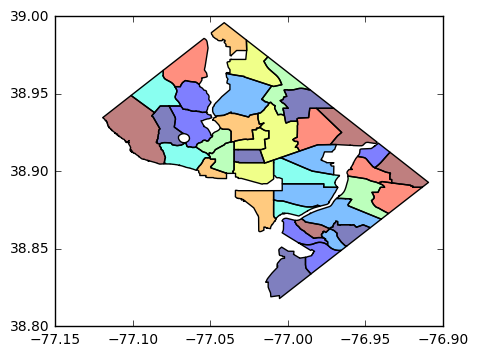

In [85]:
#from http://opendata.dc.gov/datasets/f6c703ebe2534fc3800609a07bad8f5b_17
neighborhood_clusters = gpd.read_file("../core/neighborhood_clusters/Neighborhood_Clusters.shp")
# neighborhood_clusters.plot()

In [100]:
# neighborhood_clusters.head(10).plot()

In [92]:
# import mplleaflet

# neighborhood_clusters.plot()
# mplleaflet.display()

In [127]:
sample_df = df

In [128]:
dc_df = gpd.GeoDataFrame(df, geometry=df.apply(
        lambda srs: shapely.geometry.Point(srs['x'], srs['y']), axis='columns'
    ))

In [111]:
def assign_geo_designation_tract(row):
    """ Takes in a geopandas frame and creates a new column categorizing which geoshape a row contains"""
    bools = [geom.contains(row['geometry']) for geom in neighborhood_clusters['geometry']]
    if True in bools:
        return neighborhood_clusters.iloc[bools.index(True)]['NBH_NAMES']
    else:
        return np.nan

In [129]:
dc_df['neighborhood'] = dc_df.apply(assign_geo_designation_tract, axis='columns')

KeyboardInterrupt: 

In [ ]:
neighborhood_pickle = '../data/interim/neighborhood_enriched_parking_violations.pickle'
dc_df.to_pickle(neighborhood_pickle)